## Predicting Employee Compensation with Machine Learning Technologies

This study delves into the prediction of employee compensation, a critical component in strategic human resource management. Effective compensation prediction not only ensures equitable pay structures but also enhances organizational competitiveness by attracting and retaining skilled talent. Utilizing analytical methods, including regression analysis and machine learning algorithms like XGboost, this research aims to identify key determinants of employee salaries. By accurately forecasting compensation based on variables such as age, job role, and professional experience, our analysis provides valuable insights that can help organizations make informed decisions about their pay practices, ultimately leading to improved job satisfaction and workforce stability.

In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
sns.set()

In [2]:
pd.set_option('display.max_column',None)
raw_data = pd.read_csv('C:/D/Data Science/Kaggle_Binary Classification with a Tabular Employee Attrition Dataset/train.csv')
raw_data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [3]:
data = raw_data
data['JobRole_Sales Representative'] = (raw_data['JobRole']== 'Sales Representative').astype(int)
data['Travel_Frequently'] = (raw_data['BusinessTravel']=='Travel_Frequently').astype(int)
data['Gender'] = (raw_data['Gender']=='Male').astype(int)
data['Department_RD'] = (raw_data['Department']== 'Research & Development').astype(int)
data['Department_Sales'] = (raw_data['Department']== 'Sales').astype(int)
data['OverTime'] = (data['OverTime'] == 'Yes').astype(int)
data.head()    

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,JobRole_Sales Representative,Travel_Frequently,Department_RD,Department_Sales
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,1,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,1,13,3,2,80,1,10,2,3,10,0,7,8,0,0,1,1,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,1,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,0,17,3,4,80,1,4,3,3,4,2,0,3,0,1,0,0,1
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,1,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,0,17,3,4,80,2,4,3,3,3,2,1,2,0,0,0,0,1
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,0,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,0,14,3,3,80,0,15,1,1,6,0,0,2,0,0,0,1,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,0,37,3,5,Manager,1,Single,19033,19805,1,Y,1,13,3,3,80,0,31,0,3,31,14,4,10,1,0,0,1,0


In [4]:
data.describe()
data_num = data

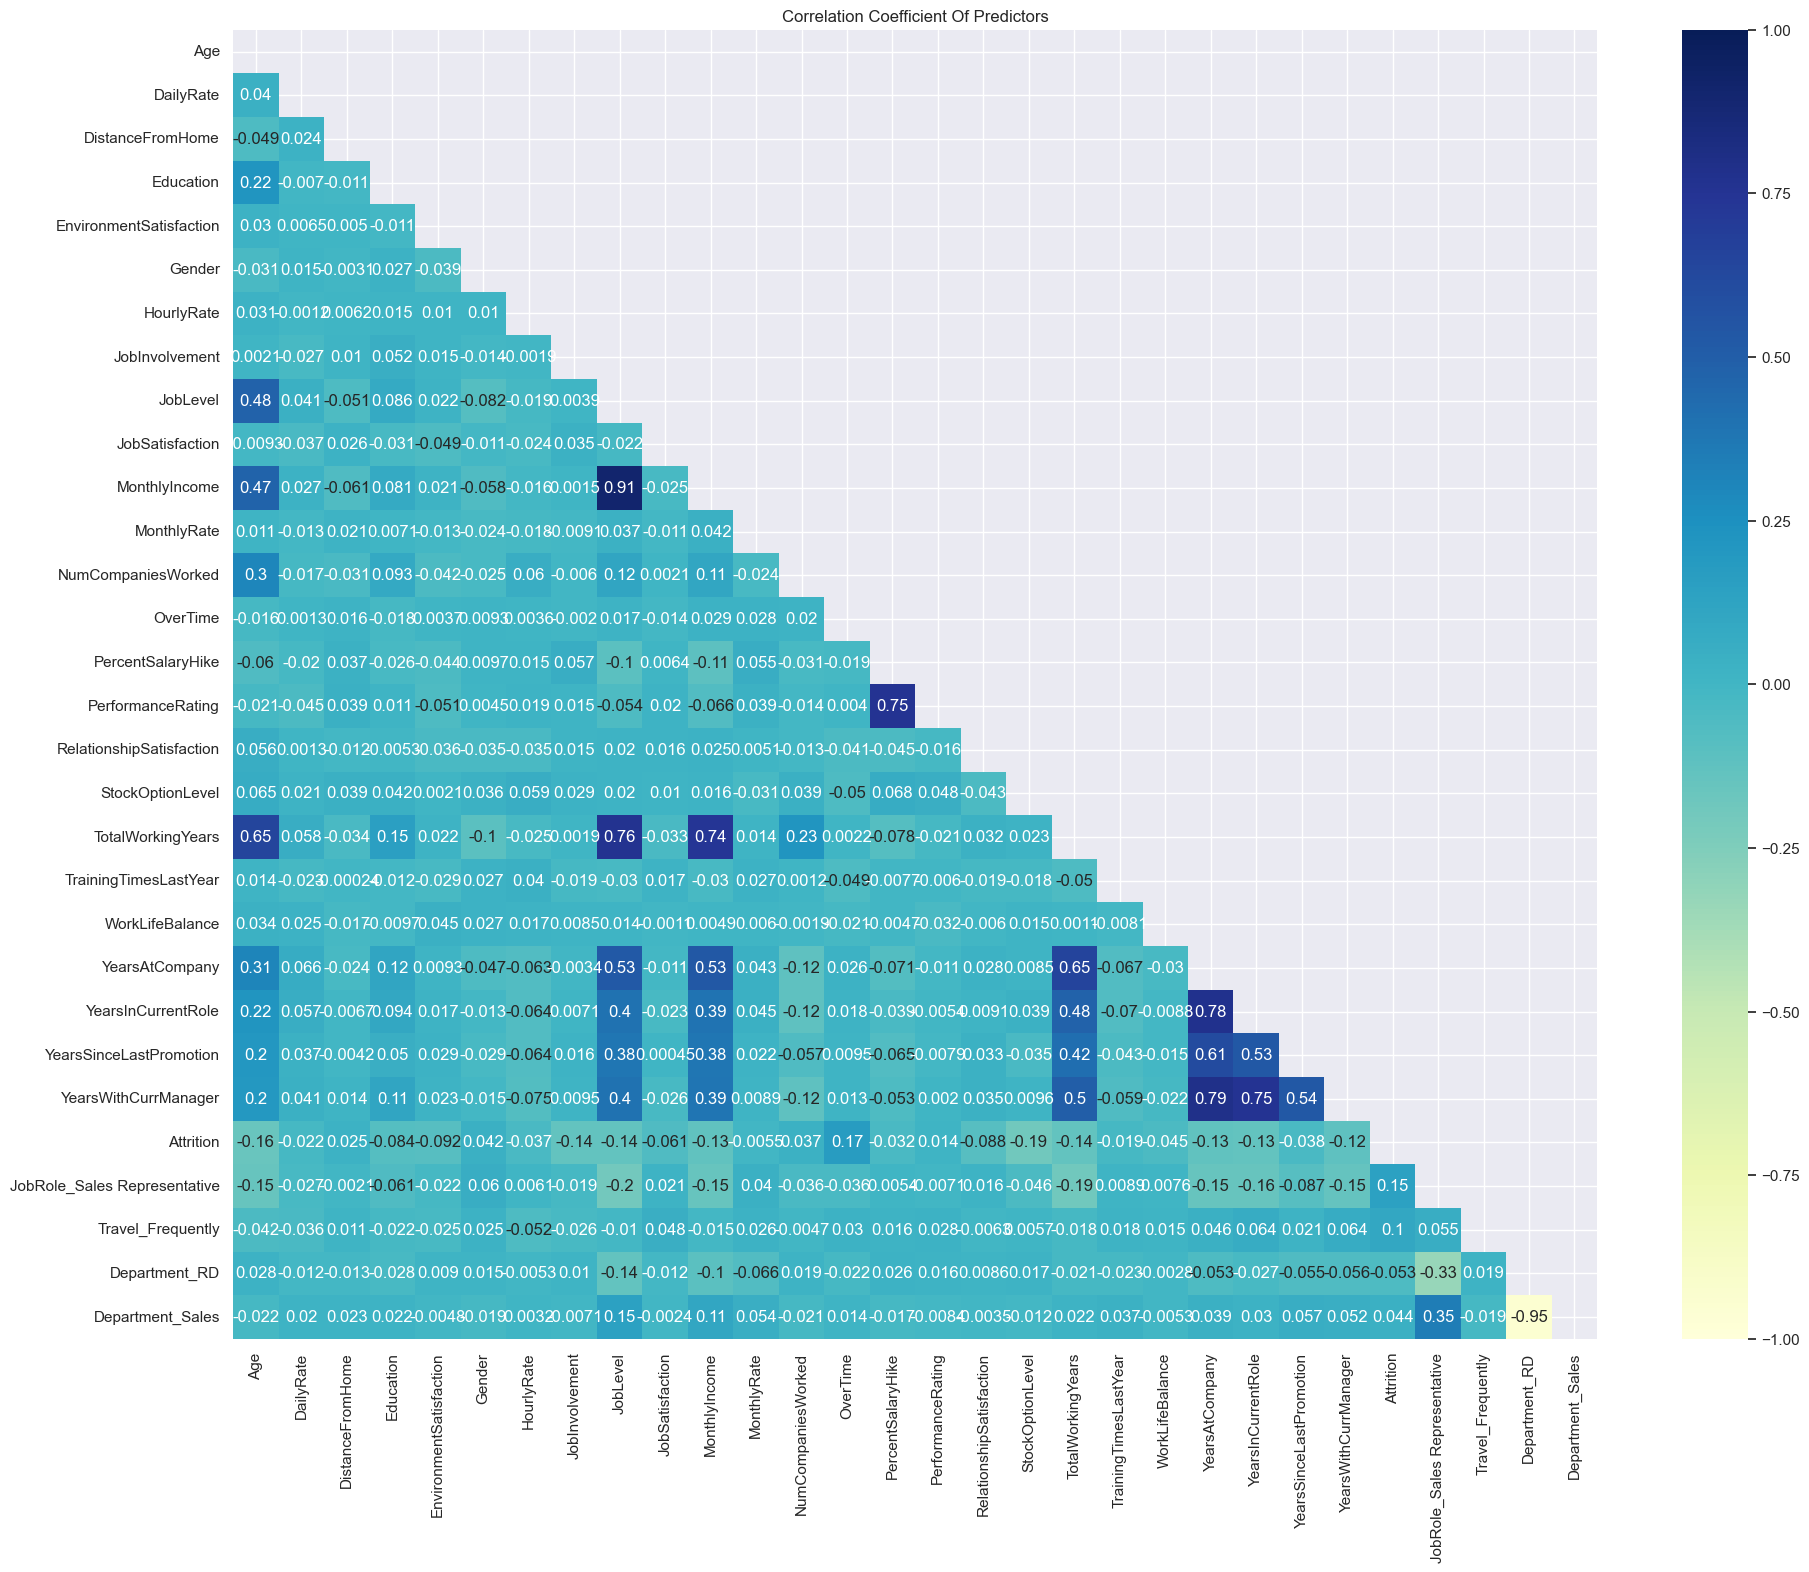

In [5]:
# Set figure size
plt.figure(figsize=(22,17))

# Drop the selected variables from the heatmap   
data_num = data.select_dtypes(exclude=['object'])
data_num = data_num.drop("EmployeeCount",axis=1)
data_num = data_num.drop("StandardHours",axis=1)
data_num = data_num.drop("id",axis=1)

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(data_num.corr(), dtype=bool))
# Generate the heatmap
sns.heatmap(data_num.corr(), annot=True, mask=mask, vmin=-1, vmax=1, cmap='YlGnBu')
plt.title('Correlation Coefficient Of Predictors')
plt.show()

#### Predictive variables:¶

In [6]:
data_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,JobRole_Sales Representative,Travel_Frequently,Department_RD,Department_Sales
0,36,599,24,3,4,1,42,3,1,4,2596,5099,1,1,13,3,2,1,10,2,3,10,0,7,8,0,0,1,1,0
1,35,921,8,3,1,1,46,3,1,1,2899,10778,1,0,17,3,4,1,4,3,3,4,2,0,3,0,1,0,0,1
2,32,718,26,3,3,1,80,3,2,4,4627,16495,0,0,17,3,4,2,4,3,3,3,2,1,2,0,0,0,0,1
3,38,1488,2,3,3,0,40,3,2,1,5347,13384,3,0,14,3,3,0,15,1,1,6,0,0,2,0,0,0,1,0
4,50,1017,5,4,2,0,37,3,5,1,19033,19805,1,1,13,3,3,0,31,0,3,31,14,4,10,1,0,0,1,0


C:\Users\bluei\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


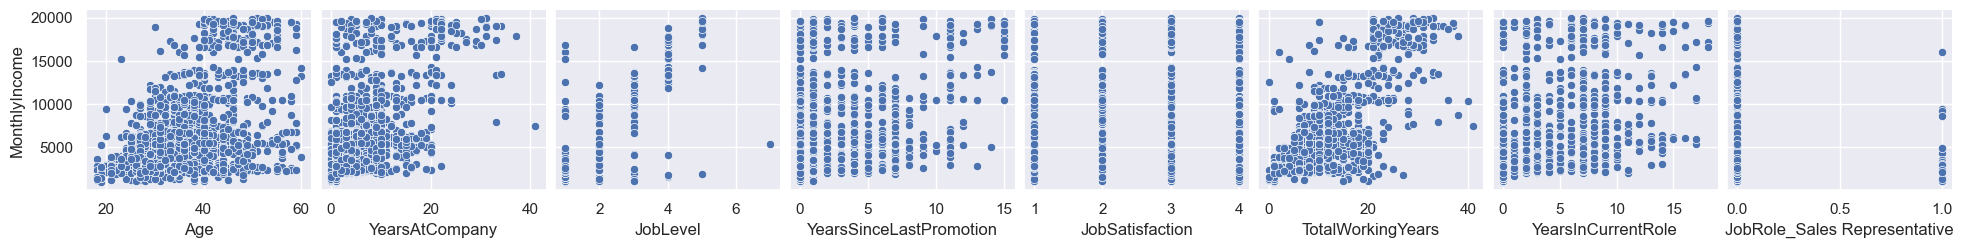

In [7]:
#fig, axes = plt.subplots(3, 3, figsize=(20, 15))
sns.pairplot( 
    data_num, 
    x_vars=['Age','YearsAtCompany','JobLevel','YearsSinceLastPromotion','JobSatisfaction','TotalWorkingYears','YearsInCurrentRole','JobRole_Sales Representative'], 
    y_vars='MonthlyIncome',   
)

In [8]:
Y = data_num['MonthlyIncome']
X = data_num[['Age','YearsAtCompany','JobLevel','YearsSinceLastPromotion','JobSatisfaction','TotalWorkingYears','YearsInCurrentRole','JobRole_Sales Representative']]

### Split data and perform Models:

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

### Linear Regression

In [10]:
Model1 = LinearRegression( ).fit(X_train, Y_train)

In [11]:
Model1.score(X_train, Y_train)

0.8212378162117845

In [12]:
Model1.coef_

array([ 1.67000655e+01,  6.38727380e+01,  3.45564121e+03,  7.50316634e+00,
       -2.17460769e+00,  2.28741889e+01, -3.49579238e+01,  8.73484620e+02])

In [13]:
Model1.fit(X_test, Y_test)

LinearRegression()

In [14]:
Model1.score(X_test, Y_test)

0.8861144438661225

### Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
Model2 = RandomForestRegressor(random_state=42).fit(X_train,Y_train)
Model2.score(X_train, Y_train)

0.972986620965639

In [16]:
Model2.fit(X_test,Y_test)
Model2.score(X_test, Y_test)

0.9810899153313393

In [17]:
Y_pred2 =Model2.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred2)

0.9810899153313393

### XGBoost

In [18]:
import xgboost as xgb
from xgboost import XGBRegressor

In [19]:
Model3 = XGBRegressor().fit(X_train, Y_train)
Model3.score(X_train,Y_train)

0.991086150018581

In [20]:
Model3 = XGBRegressor().fit(X_test, Y_test)
Model3.score(X_test,Y_test)

0.9997221435123167

In [21]:
Y_pred3 = Model3.predict(X_test)
r2_score(Y_test,Y_pred3)

0.9997221435123167

### Ensemble modeling - Voting 

In [22]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score

In [23]:
Voting = VotingRegressor(estimators=[('reg1', Model1), ('reg2', Model2), ('reg3', Model3)])
Voting.fit(X_test, Y_test)
Voting.score(X_test, Y_test)

0.9763581915177899

### Summary

The regression analysis identified significant predictors of employees' monthly income, such as age, job level, job satisfaction, total working years, years in current role, and job role. The use of XGboosting techniques notably enhanced the model's predictive accuracy for employee compensation, achieving a predictive performance above 0.99. This demonstrates XGboost's effectiveness in improving predictive models.